# I. Import dataset for training

In [ ]:
import pandas as pd

# read the csv file that got cleaned and merge trsnact with skuinfo and deptinfo
df = pd.read_csv("trnsact_final.csv") 
df.head()

,store,city,state,zip,sku,register,trannum,interid,saledate,saletype,...,orgprice,amount,seq,mic,sale_month,saledayofweek,saleday,cost,retail,dept
0,102,TAMPA,FL,33607,259,640,2100,105306984,2005-08-07,P,...,18.0,18.00,101100007,561,8,Sunday,7,3.4,18.0,4402
1,102,TAMPA,FL,33607,387,570,1500,0,2005-06-20,P,...,79.0,79.00,453500004,696,6,Monday,20,38.0,79.0,9306
2,102,TAMPA,FL,33607,387,570,1800,0,2004-12-04,P,...,79.0,52.93,407500015,696,12,Saturday,4,38.0,79.0,9306
3,102,TAMPA,FL,33607,387,570,6800,0,2004-10-15,P,...,79.0,79.00,647200005,696,10,Friday,15,38.0,79.0,9306
4,102,TAMPA,FL,33607,450,60,1700,543207327,2005-06-06,P,...,6.0,4.80,786600004,844,6,Monday,6,2.0,3.0,1202


In [4]:
df1 = df[['store','city','state','zip','sku','dept','saledate','saletype','cost','orgprice','retail','amount','quantity']]
df1.describe()

,store,zip,sku,dept,cost,orgprice,retail,amount,quantity
count,6.728946e+07,6.728946e+07,6.728946e+07,6.728946e+07,6.728946e+07,6.728946e+07,6.728946e+07,6.728946e+07,67289463.0
mean,4.441785e+03,5.860251e+04,4.931729e+06,4.032898e+03,1.528432e+01,3.483970e+01,2.114337e+01,2.514781e+01,1.0
std,2.839623e+03,2.146316e+04,2.845083e+06,2.654051e+03,1.699966e+01,3.971936e+01,2.758424e+01,2.778935e+01,0.0
min,1.020000e+02,2.306000e+04,3.000000e+00,8.000000e+02,0.000000e+00,1.000000e-02,0.000000e+00,1.000000e-02,1.0
25%,2.109000e+03,3.540500e+04,2.598049e+06,1.301000e+03,7.150000e+00,1.450000e+01,8.500000e+00,1.000000e+01,1.0
50%,4.103000e+03,6.720700e+04,4.756413e+06,4.303000e+03,1.110000e+01,2.400000e+01,1.600000e+01,1.800000e+01,1.0
75%,7.102000e+03,7.754600e+04,7.348365e+06,6.402000e+03,1.860000e+01,4.400000e+01,2.450000e+01,3.150000e+01,1.0
max,9.909000e+03,9.520700e+04,9.999997e+06,9.801000e+03,2.700000e+03,6.017000e+03,6.017000e+03,6.017000e+03,1.0


# II. Exploratory Data Analysis
## 1. Total sale by date and month

/tmp/ipykernel_179893/1681072202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['saledate'] = pd.to_datetime(df1['saledate'])


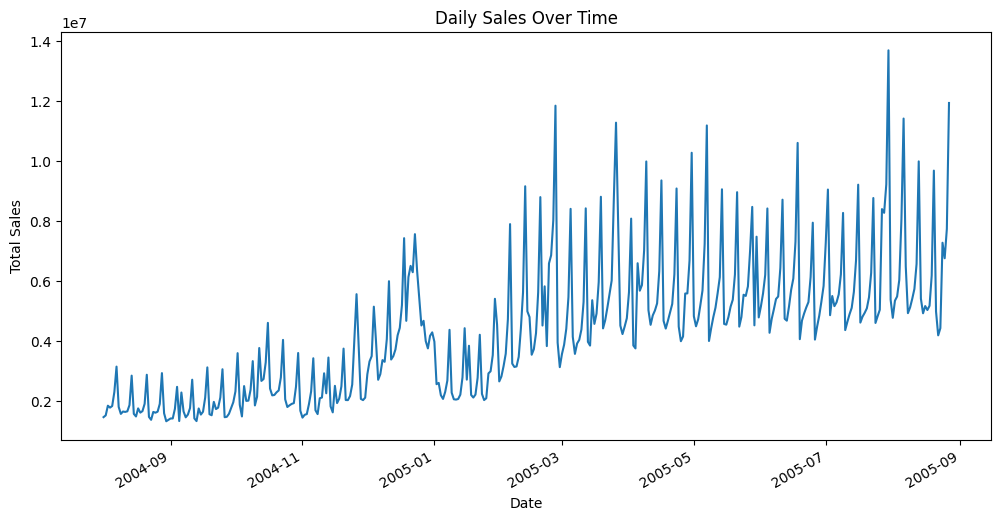

In [ ]:
# Convert 'saledate' to datetime
df1['saledate'] = pd.to_datetime(df1['saledate'])

# Aggregate sales by date
daily_sales = df1.groupby('saledate')['amount'].sum()

# Plot daily sales
plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


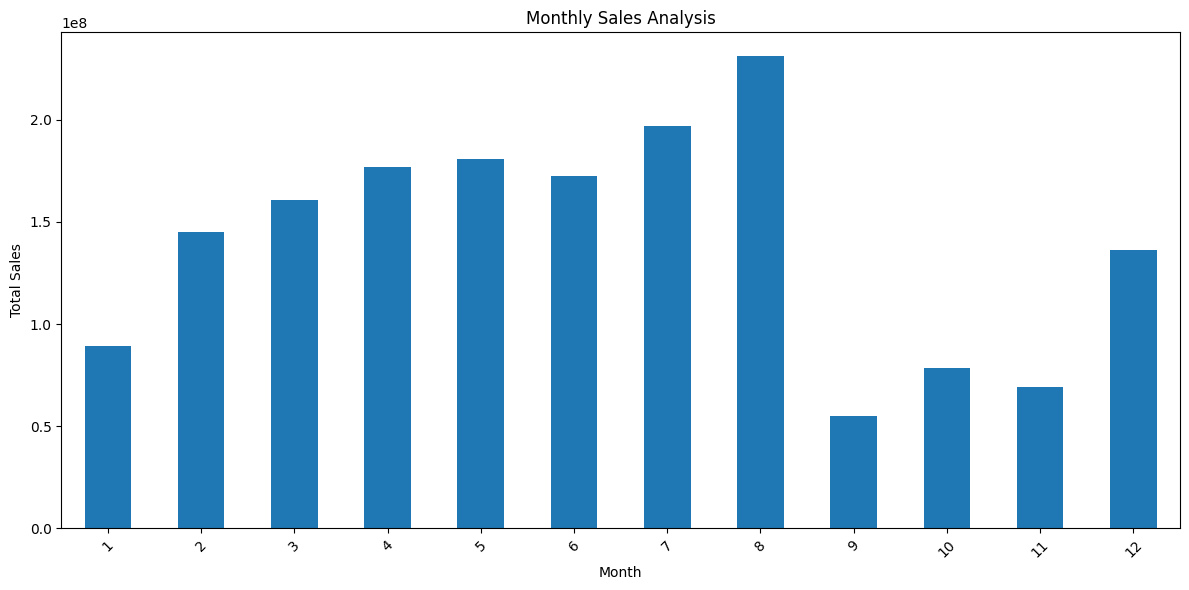

In [36]:
# Basic month number (1-12)
monthly_sales = df1.groupby(df1['saledate'].dt.month)['amount'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar')
plt.title("Monthly Sales Analysis")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Total sale by state and city

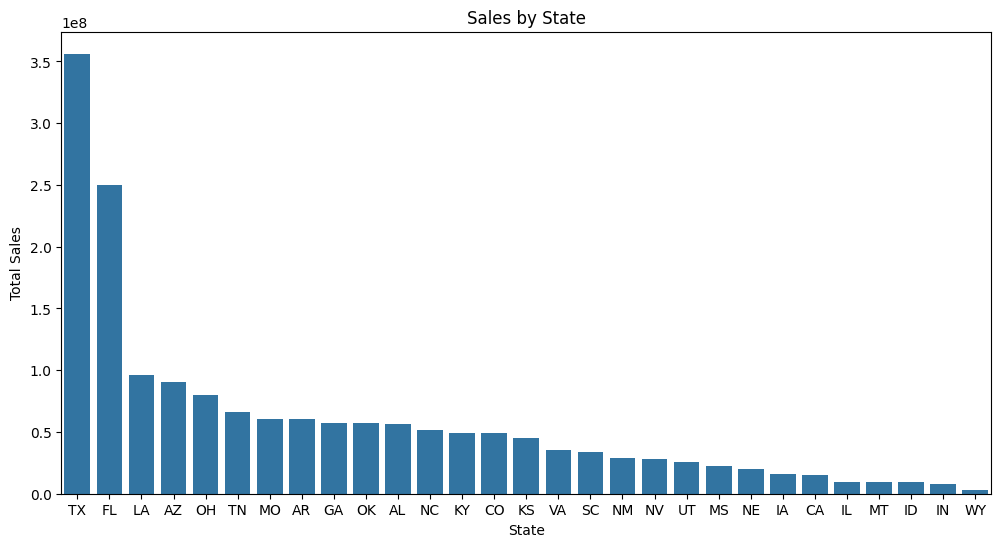

In [32]:
# Sales by state
state_sales = df1.groupby('state')['amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_sales.index, y=state_sales.values)
plt.title("Sales by State")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.show()
s = state_sales.reset_index()

In [31]:
import folium
import requests

# Create a base map centered on US
m = folium.Map(location=[40, -98], zoom_start=4)

# Get US states GeoJSON data
url = "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
state_geo = requests.get(url).json()

# Create choropleth map
folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_sales,
    columns=['state', 'amount'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Sales ($)'
).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Display the map
m

In [ ]:
# Total sales by state
city_sales = df1.groupby('city')['amount'].sum().sort_values(ascending=False)
c = city_sales.reset_index()
c.head()

,city,amount
0,HOUSTON,32734348.81
1,SAN ANTONIO,27344559.89
2,CINCINNATI,22079187.48
3,DALLAS,20772251.45
4,OKLAHOMA CITY,20708309.25


In [ ]:
# plot total sale by city

!pip install geopy
import folium
from geopy.geocoders import Nominatim

# Create a geocoder instance
geolocator = Nominatim(user_agent="my_app")

# Get coordinates for each city
coordinates = []
for city in c['city']:
    try:
        location = geolocator.geocode(f"{city}, USA")
        coordinates.append([location.latitude, location.longitude])
    except:
        continue

# Create a base map centered on US
m_c = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Add circles for each city
for i in range(len(coordinates)):
    folium.Circle(
        location=coordinates[i],
        radius=float(c['amount'][i])/1000,  # Adjust radius based on sales
        popup=f"{c['city'][i]}: ${c['amount'][i]:,.2f}",
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m_c)

# Display the map
m_c

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


## 3. Total sale by product department

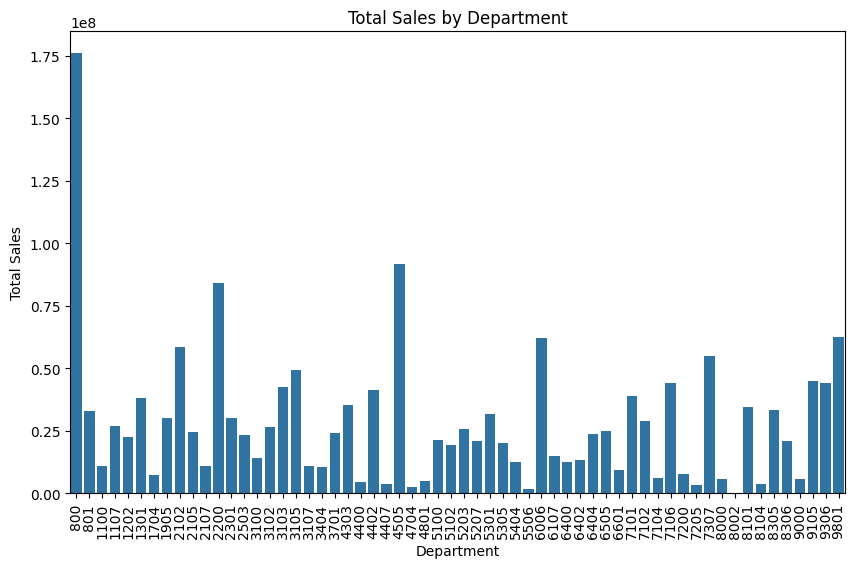

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total sales by department
dept_sales = df1.groupby('dept')['amount'].sum().sort_values(ascending=False) 

plt.figure(figsize=(10, 6))
sns.barplot(x=dept_sales.index, y=dept_sales.values)
plt.title("Total Sales by Department")
plt.xlabel("Department")
plt.xticks(rotation = 90)
plt.ylabel("Total Sales")
plt.show()


## 4. Group the data for prediction of sale by department

In [ ]:
# Total sales by store with respect to month, average cost, average retail price of product category 
dept_sale = df1.groupby(['dept','sale_month', 'state', 'city', 'store']).agg(
    avg_cost=('cost', 'mean'),
    avg_price=('orgprice', 'mean'),
    avg_retail=('retail', 'mean'),
    num_sale=('quantity', 'sum'),
    amount=('amount', 'sum')
).reset_index()
dept_sale

,dept,sale_month,state,city,store,avg_cost,avg_price,avg_retail,num_sale,amount
0,800,1,AL,AUBURN,7302,11.260305,18.341163,18.767469,1703,31235.00
1,800,1,AL,DECATUR,5404,11.522414,18.766523,19.204023,696,13061.50
2,800,1,AL,DOTHAN,7402,11.282245,18.307823,18.804422,1470,26908.75
3,800,1,AL,FLORENCE,5304,11.639349,18.979290,19.399901,1014,19245.00
4,800,1,AL,HUNTSVILLE,5604,11.060328,18.039891,18.433880,915,16503.13
...,...,...,...,...,...,...,...,...,...,...
210589,9801,12,SC,NORTH CHARLESTON,6204,12.970000,42.000000,10.500000,2,9.98
210590,9801,12,UT,MURRAY,3009,11.400000,40.000000,10.000000,1,15.00
210591,9801,12,VA,CHESAPEAKE,7204,16.500000,46.000000,11.500000,1,5.75
210592,9801,12,VA,GLEN ALLEN,7804,15.856429,46.857143,9.461071,28,328.00


In [45]:
dept_sale.to_pickle('dept_sale.pkl')

# III. Sale predictive analysis

In [ ]:
import pickle

# Replace 'your_file.pkl' with the path to your pickle file
with open('dept_sale.pkl', 'rb') as file:
    data = pickle.load(file)

# Now 'data' contains the contents of the pickle file
data

,dept,saledate,state,city,saletype,avg_cost,avg_price,avg_retail,num_sale,amount
0,800,2004-08-01,AL,AUBURN,P,11.017241,17.862069,18.362069,29,518.00
1,800,2004-08-01,AL,AUBURN,R,11.700000,19.500000,19.500000,2,39.00
2,800,2004-08-01,AL,DECATUR,P,9.927273,15.772727,16.545455,11,173.50
3,800,2004-08-01,AL,DECATUR,R,22.500000,37.500000,37.500000,1,37.50
4,800,2004-08-01,AL,DOTHAN,P,12.588889,20.296296,20.981481,27,548.00
...,...,...,...,...,...,...,...,...,...,...
6184955,9801,2005-08-27,VA,RICHMOND,R,22.165000,68.250000,31.933000,20,628.59
6184956,9801,2005-08-27,VA,VIRGINIA BEACH,P,27.074074,81.907222,37.315185,54,1437.46
6184957,9801,2005-08-27,VA,VIRGINIA BEACH,R,24.233333,68.666667,33.106667,6,163.40
6184958,9801,2005-08-27,WY,CHEYENNE,P,21.153571,76.642857,38.321429,14,375.55


In [ ]:
import pandas as pd
# sale by dept at each store in a month
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6184960 entries, 0 to 6184959
Data columns (total 10 columns):
 #   Column      Dtype         
---  ------      -----         
 0   dept        int64         
 1   saledate    datetime64[ns]
 2   state       object        
 3   city        object        
 4   saletype    object        
 5   avg_cost    float64       
 6   avg_price   float64       
 7   avg_retail  float64       
 8   num_sale    int64         
 9   amount      float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 471.9+ MB


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

## 1. Preprocess data for training

### Remove outlier in sale

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['num_sale'].quantile(0.25)
Q3 = data['num_sale'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
data_filtered = data[(data['num_sale'] >= lower_bound) & (data['num_sale'] <= upper_bound)]

# Print the shape of the filtered data
print(data_filtered.shape)

(5466357, 10)


### Convert datetime data

In [ ]:
data_filtered['sale_month'] = data_filtered['saledate'].dt.month   # convert to datetime
data_aggregated = data_filtered.groupby(['dept', 'sale_month','saletype']).agg(
    avg_cost=('avg_cost', 'mean'),
    avg_price=('avg_price', 'mean'),
    avg_retail=('avg_retail', 'mean'),
    num_sale=('num_sale', 'sum'),
    amount=('amount', 'sum')
).reset_index()

data_aggregated

C:\Users\voqua\AppData\Local\Temp\ipykernel_17036\2589132036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['sale_month'] = data_filtered['saledate'].dt.month   # convert to datetime


,dept,sale_month,saletype,avg_cost,avg_price,avg_retail,num_sale,amount
0,800,1,P,11.390128,18.538014,18.983648,16937,313995.50
1,800,1,R,12.428088,20.271652,20.713803,24882,495354.43
2,800,2,P,11.552212,18.799429,19.254308,14697,274824.00
3,800,2,R,11.906217,19.394446,19.844674,19941,378844.60
4,800,3,P,11.411450,18.571000,19.019638,18558,343474.50
...,...,...,...,...,...,...,...,...
1400,9801,10,R,18.197902,57.752646,11.476582,473,4621.76
1401,9801,11,P,15.297949,47.822349,7.149421,889,4919.12
1402,9801,11,R,16.814626,54.254096,10.398954,191,1845.87
1403,9801,12,P,15.174766,48.460645,6.353634,535,3082.03


### Creat dummy variables for month

In [ ]:
# Create dummy variables for each month
month_dummies = pd.get_dummies(data_aggregated['sale_month'], prefix='month').astype(int)
type_dummies = pd.get_dummies(data_aggregated['saletype'], prefix='type').astype(int)

# Concatenate the dummy variables with the original dataframe
data_with_dummies = pd.concat([data_aggregated, month_dummies, type_dummies], axis=1)

# Drop the original 'sale_month' column
data_with_dummies = data_with_dummies.drop(['sale_month', 'saletype'], axis=1)

data_with_dummies.head()

,dept,avg_cost,avg_price,avg_retail,num_sale,amount,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,type_P,type_R
0,800,11.390128,18.538014,18.983648,16937,313995.50,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,800,12.428088,20.271652,20.713803,24882,495354.43,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,800,11.552212,18.799429,19.254308,14697,274824.00,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,800,11.906217,19.394446,19.844674,19941,378844.60,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,800,11.411450,18.571000,19.019638,18558,343474.50,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Split the data into training and testing sets
X = data_with_dummies.drop(columns=['dept','num_sale'])
y = data_with_dummies['num_sale']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Train model to predict num_sale by deprtment
- For each dept for each store within each month for inventory prediction
- Train on data from 2004 and test on data in 2005

In [ ]:
import statsmodels.api as sm
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the features (intercept term)
X_train_const = sm.add_constant(X_train)

# Fit the linear model
linear_model = sm.OLS(y_train, X_train_const).fit()

# Print the summary of the model
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:               num_sale   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     177.9
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          3.84e-292
Time:                        23:02:31   Log-Likelihood:                -12047.
No. Observations:                1124   AIC:                         2.413e+04
Df Residuals:                    1107   BIC:                         2.421e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.046e+04    335.595     31.164      0.0

In [ ]:
# Evaluation metrics
y_pred =  linear_model.predict(sm.add_constant(X_test))     

print("Sales Prediction Metrics with Best Parameters:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred)**(1/2))
print("R2 Score:", r2_score(y_test, y_pred))


Sales Prediction Metrics with Best Parameters:
MAE: 8498.409701485847
RMSE: 12065.556959507927
R2 Score: 0.6411182889392855


## 3. Key Findings & Recommendations

### Pricing and Costs
1. **Cost Management** (coef: -322.03, p<0.001)
   * Higher average costs significantly decrease sales volume
   * Recommendation: Optimize procurement and negotiate better supplier rates to reduce costs

2. **Price Sensitivity**
   * Average price and retail price don't significantly impact sales (p>0.05)
   * Recommendation: There's flexibility in pricing strategy without severely impacting sales volume

### Seasonal Patterns
1. **Peak Season** (July-August)
   * July: +4,956 units (p<0.001)
   * August: +8,646 units (p<0.001)
   * Recommendation: Increase inventory and staffing during these months

2. **Low Season** (September-November)
   * September: -3,811 units (p<0.001)
   * October: -4,004 units (p<0.001)
   * November: -3,758 units (p<0.001)
   * Recommendation: Implement promotional strategies during these months to boost sales

### Store Types
1. **Type P Stores** (coef: +11,590, p<0.001)
   * Significantly higher sales performance
   * Recommendation: Study and replicate successful practices from Type P stores

2. **Type R Stores** (coef: -1,129, p<0.004)
   * Lower performance compared to other types
   * Recommendation: Investigate underlying issues and implement improvement strategies

### Action Plan
1. Focus on cost reduction strategies
2. Prepare for peak season (July-August) with adequate inventory
3. Develop specific strategies for low season (September-November)
4. Analyze and replicate Type P stores' success factors
5. Investigate and improve Type R stores' performance

*Note: The model shows good predictive power (R-squared: 0.72), suggesting these recommendations are based on reliable statistical evidence.*

## 4. Return On Investment (ROI)

In [ ]:
data_aggregated

,dept,sale_month,saletype,avg_cost,avg_price,avg_retail,num_sale,amount
0,800,1,P,11.390128,18.538014,18.983648,16937,313995.50
1,800,1,R,12.428088,20.271652,20.713803,24882,495354.43
2,800,2,P,11.552212,18.799429,19.254308,14697,274824.00
3,800,2,R,11.906217,19.394446,19.844674,19941,378844.60
4,800,3,P,11.411450,18.571000,19.019638,18558,343474.50
...,...,...,...,...,...,...,...,...
1400,9801,10,R,18.197902,57.752646,11.476582,473,4621.76
1401,9801,11,P,15.297949,47.822349,7.149421,889,4919.12
1402,9801,11,R,16.814626,54.254096,10.398954,191,1845.87
1403,9801,12,P,15.174766,48.460645,6.353634,535,3082.03


### Find monthly ROI and ROI of each department for the whole business

C:\Users\voqua\AppData\Local\Temp\ipykernel_17036\4209200994.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_roi = data_aggregated.groupby('sale_month').apply(
C:\Users\voqua\AppData\Local\Temp\ipykernel_17036\4209200994.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='sale_month', y='ROI', data=monthly_roi, palette='viridis')


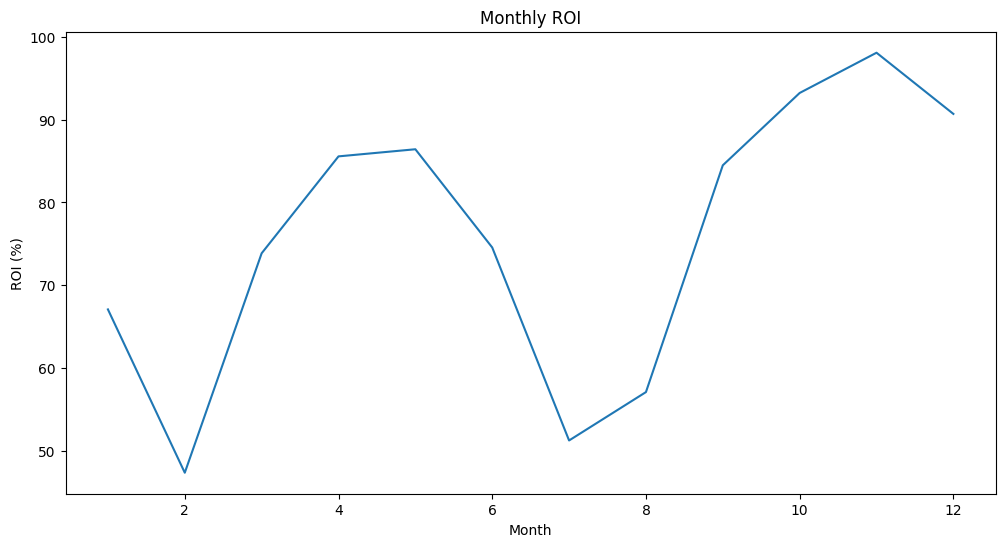

C:\Users\voqua\AppData\Local\Temp\ipykernel_17036\4209200994.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dept_roi = data_aggregated.groupby('dept').apply(
C:\Users\voqua\AppData\Local\Temp\ipykernel_17036\4209200994.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dept', y='ROI', data=dept_roi, palette='viridis')


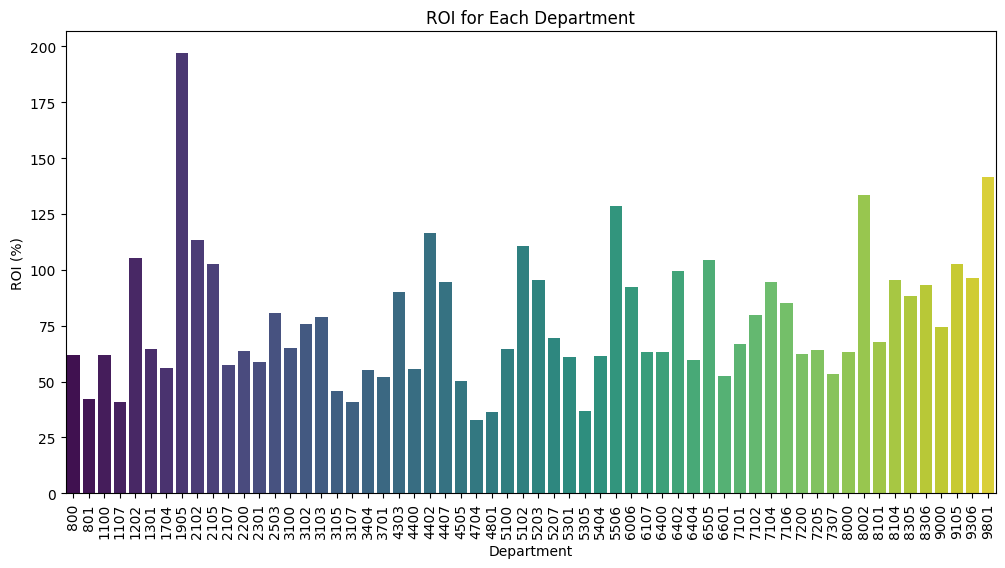

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate costs for each row
data_aggregated['total_cost'] = data_aggregated['avg_cost'] * data_aggregated['num_sale']

# Group by sale_month to calculate total revenue, total cost, and ROI
monthly_roi = data_aggregated.groupby('sale_month').apply(
    lambda x: pd.Series({
        'total_revenue': x['amount'].sum(),
        'total_cost': x['total_cost'].sum(),
        'ROI': ((x['amount'].sum() - x['total_cost'].sum()) / x['total_cost'].sum()) * 100
    })
).reset_index()

# Plot the ROI for each month
plt.figure(figsize=(12, 6))
sns.lineplot(x='sale_month', y='ROI', data=monthly_roi, palette='viridis')

plt.xlabel('Month')
plt.ylabel('ROI (%)')
plt.title('Monthly ROI')
plt.grid(False)
plt.show()

# Group by dept to calculate total revenue, total cost, and ROI for each department
dept_roi = data_aggregated.groupby('dept').apply(
    lambda x: pd.Series({
        'total_revenue': x['amount'].sum(),
        'total_cost': x['total_cost'].sum(),
        'ROI': ((x['amount'].sum() - x['total_cost'].sum()) / x['total_cost'].sum()) * 100
    })
).reset_index()

# Plot the ROI for each department
plt.figure(figsize=(12, 6))
sns.barplot(x='dept', y='ROI', data=dept_roi, palette='viridis')

plt.xlabel('Department')
plt.ylabel('ROI (%)')
plt.title('ROI for Each Department')
plt.xticks(rotation=90)
# Remove grid for all plots
plt.grid(False)
plt.show()

### Return On Investment (ROI) Analysis

Return on Investment (ROI) is a key performance indicator used to evaluate the efficiency of an investment. It is calculated as the ratio of net profit to the total cost of the investment, expressed as a percentage.

#### ROI Calculation
In this analysis, ROI is calculated for each department and each month. The formula used is:

\[ \text{ROI} = \left( \frac{\text{Total Revenue} - \text{Total Cost}}{\text{Total Cost}} \right) \times 100 \]

#### Monthly ROI
The monthly ROI data is summarized in the `monthly_roi` dataframe. Here is a brief overview of the monthly ROI:

| Month | Total Revenue | Total Cost | ROI (%) |
|-------|---------------|------------|---------|
| 1     | 57,990,000    | 34,710,000 | 67.08   |
| 2     | 71,730,000    | 48,670,000 | 47.37   |
| 3     | 89,350,000    | 51,390,000 | 73.86   |
| 4     | 96,800,000    | 52,170,000 | 85.56   |
| 5     | 104,000,000   | 55,770,000 | 86.41   |
| 6     | 94,730,000    | 54,270,000 | 74.56   |
| 7     | 88,860,000    | 58,750,000 | 51.26   |
| 8     | 114,700,000   | 72,980,000 | 57.10   |
| 9     | 34,090,000    | 18,480,000 | 84.48   |
| 10    | 42,310,000    | 21,900,000 | 93.21   |
| 11    | 45,980,000    | 23,210,000 | 98.07   |
| 12    | 77,470,000    | 40,630,000 | 90.68   |

#### Departmental ROI
The departmental ROI data is summarized in the `dept_roi` dataframe. Here is a brief overview of the departmental ROI:

| Department | Total Revenue | Total Cost | ROI (%) |
|------------|---------------|------------|---------|
| 800        | 9,894,000     | 6,104,000  | 62.09   |
| 801        | 29,010,000    | 20,390,000 | 42.30   |
| 1100       | 9,935,000     | 6,136,000  | 61.92   |
| 1107       | 16,490,000    | 11,720,000 | 40.65   |
| 1202       | 3,185,000     | 1,552,000  | 105.30  |
| ...        | ...           | ...        | ...     |
| 9801       | 24,490,000    | 10,140,000 | 141.60  |

#### Key Insights
1. **High ROI Months**: The months of April, May, October, and November show the highest ROI, indicating these are the most profitable months.
2. **Low ROI Months**: The months of February and July have the lowest ROI, suggesting these months are less profitable.
3. **High ROI Departments**: Departments such as 1202, 1905, 2102, and 9801 have the highest ROI, indicating strong performance.
4. **Low ROI Departments**: Departments such as 801, 1107, and 3107 have lower ROI, suggesting areas for improvement.

#### Recommendations
1. **Focus on High ROI Months**: Increase inventory and marketing efforts during high ROI months to maximize profits.
2. **Improve Low ROI Months**: Implement promotional strategies and cost-saving measures during low ROI months to boost profitability.
3. **Analyze High ROI Departments**: Study the practices of high ROI departments and replicate their strategies across other departments.
4. **Address Low ROI Departments**: Investigate the reasons for low ROI in certain departments and implement targeted improvement plans.

By focusing on these key areas, the overall ROI can be improved, leading to higher profitability and better resource allocation.
```